# Deep Learning

<img src="https://i.giphy.com/IW7oZF4MGJsfS.gif">

### Examples
- [music-vae](https://magenta.tensorflow.org/music-vae)
- [Magenta's AI Jam](https://www.youtube.com/watch?v=ZRnbbtqxBEc)
- [Mario Bros](https://www.youtube.com/watch?v=qv6UVOQ0F44)
- [affinelayer](https://affinelayer.com/pixsrv/)
- [CycleGAN](https://junyanz.github.io/CycleGAN/)
- [Documental](https://www.youtube.com/watch?v=sHVwwriaT6k)
- [Podcast](https://www.youtube.com/watch?v=tDzqbbq0R6A&t=7360s)

- ## **"No free Lauch"** Theorems [Link](http://www.no-free-lunch.org/):
    <p>There is no learning algorithm that works for all the problems that exist.
      Some models will fail some datasets.</p>
- ## **Leaky Abstractions** [Link](https://en.wikipedia.org/wiki/Leaky_abstraction):
    <p>There is no API that does the work for us, on some occasions we will have to dig deeper and go beyond the API</p>
- ## **Hard Work**:
    - Complex Models
    - Visualización
    - Generalization Undestanding
    - CPU and GPU Time (Execution Time / Computing Time)
    

## Learning algorithms

<img src="https://hackernoon.com/hn-images/0*VW4luAF5NCxhOykO.gif">

- Model Space **H**
- Loss Function **L**
- Optimizer Method

training a neural network corresponds to finding a model within H whose loss is minimal on the dataset.

- ### Model Prediction: $$m(x)  \text{ - Predict an input}$$
- ### Loss Function: $$L(m(x), y)  \text{ - Copare the output with the real targets}$$ 
- ### Absolute Loss Function: $$L(m,D) = \frac{1}{N}\sum_{x \epsilon D} L(m(x), y) \text{ - Average of total loss}$$
- ### Minimization problem: $$\hat{m} = min_{m \epsilon H} L(m,D) \text{ - Model with the min loss}$$

## Parameterization

We need to define: 
1. Target (what we would like to predict)
2. Preprocess Data 
3. Select a Learning Method / Algorithm / Process
4. In some cases we will need to adjust the parameters to obtain the best performance and Just like when we work with ML we need to find the best parameters for our model (**Tuning**)


### Model Space

[Docs](https://pytorch.org/docs/stable/nn.html)

In [1]:
import torch.nn as nn 

In [2]:
class Net(nn.Module):
    
    # Layered architecture
    
    def __init__(self): 
        super(Net, self).__init__()
        self.convolutional = nn.Conv2d(3,9,3) # in_ch, out_ch, kernel_size
        self.relu = nn.ReLU(True)             # Activation Function
        self.fc = nn.Linear(255, 10)
        
    def forward(self,x):
        x = self.relu(self.convolutional(x))
        x = x.view(-1, 255)
        x = self.fc(x)
        return x

In [3]:
net1 = Net()
net2 = Net()
net1.named_parameters() == net2.named_parameters() # the 2 nets are different

False

the architecture defines a model space
we need to find the optimal parameters (Loss Function)

The larger the model space, the larger the capacity.

More Capacity = More Learning but will be more hard to train


### Convolutional Architecture

( Conv - ReLu - pool) * - FC

Concolution formula 

- I - input img size
- O - Output img size
- C - in_channels
- F - kernel_size
- K - Filters
- P - Padding 
- S - Stride

$$C x I x I = K x O x O  $$

$$O = \frac{I - F + 2P  }{S} + I$$

## Optimization Methods

### Backpropagation

Backpropagation is a method of calculating the gradient used in supervised learning algorithms used to establish artificial neural networks. The method employs a two-phase propagation-adaptation cycle. Once a pattern has been applied to the input of the network as a stimulus, it propagates from the first layer through the subsequent layers of the network, until generating an output. The output signal is compared to the desired output and an error signal is calculated for each of the outputs.

<img width=800 src="https://i.ytimg.com/vi/Ilg3gGewQ5U/maxresdefault.jpg">

In [4]:
'''
    net = Net().to(device) # to GPU
    loss_function = nn.NLLLoss() # Loss Function
    optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.9) # Optimizer SGD
    
    for inputs, targets in dataloader:
        optimizer.zero_grad() # Update to 0 the calculation of the gradient
        
        outputs = net(inputs) # Outputs of our nn
        loss = loss_function(outputs, target) # Calculate the loss
        
        loss.backward() # Backpropagation (Magic!) 
        optimizer.step() # Update the optimizer

'''

'\n    net = Net().to(device) # to GPU\n    loss_function = nn.NLLLoss() # Loss Function\n    optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.9) # Optimizer SGD\n    \n    for inputs, targets in dataloader:\n        optimizer.zero_grad() # Update to 0 the calculation of the gradient\n        \n        outputs = net(inputs) # Outputs of our nn\n        loss = loss_function(outputs, target) # Calculate the loss\n        \n        loss.backward() # Backpropagation (Magic!) \n        optimizer.step() # Update the optimizer\n\n'

In [5]:
import torch

In [6]:
x = torch.Tensor(2)
x, x.requires_grad # Disable

(tensor([0., 0.]), False)

In [7]:
x.requires_grad=True # Enable

In [8]:
loss = 13*x[0] + 7*x[1] + 1 # Lineal function 
loss.backward()
print(x)
x.grad

tensor([0., 0.], requires_grad=True)


tensor([13.,  7.])

In [9]:
# Autograd

x = torch.rand((2,3), requires_grad=True)
y = torch.Tensor([[1,2],[3,4]])
loss = y.mm(x)
loss = loss.sum()
loss.backward()
x.grad

tensor([[4., 4., 4.],
        [6., 6., 6.]])

In [10]:
# with torch.set_grad_enabled(true) # This line enable all requires_grad in Tensors

In [11]:
from External_Libraries import optimizers_viz as optviz

In [12]:
problem = optviz.build_beales_problem()
constructors = optviz.build_optimizers(problem.lr)
params = optviz.build_params(problem)

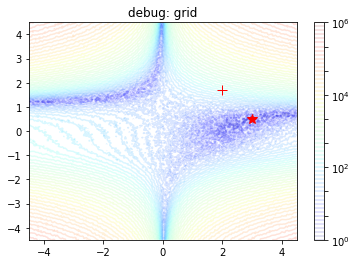

In [13]:
optviz.plot_minimized_function(params)

In [14]:
constructors

{'SGD': <function External_Libraries.optimizers_viz.build_optimizers.<locals>.<lambda>(params)>,
 'momentum': <function External_Libraries.optimizers_viz.build_optimizers.<locals>.<lambda>(params)>,
 'momentum_dampen': <function External_Libraries.optimizers_viz.build_optimizers.<locals>.<lambda>(params)>,
 'nesterov': <function External_Libraries.optimizers_viz.build_optimizers.<locals>.<lambda>(params)>,
 'nesterov_decay': <function External_Libraries.optimizers_viz.build_optimizers.<locals>.<lambda>(params)>,
 'Adadelta': <function External_Libraries.optimizers_viz.build_optimizers.<locals>.<lambda>(params)>,
 'Adagrad': <function External_Libraries.optimizers_viz.build_optimizers.<locals>.<lambda>(params)>,
 'Adamax': <function External_Libraries.optimizers_viz.build_optimizers.<locals>.<lambda>(params)>,
 'RMSprop': <function External_Libraries.optimizers_viz.build_optimizers.<locals>.<lambda>(params)>,
 'Adam': <function External_Libraries.optimizers_viz.build_optimizers.<locals>

In [15]:
zpaths, results, distance, lrs = optviz.run_optimizers(problem, constructors, params)


SGD 176.70858023166144 	 True 	 False
momentum 173.36841214107292 	 True 	 False
momentum_dampen 174.54597650245853 	 True 	 False
nesterov 177.98951047477595 	 True 	 False
nesterov_decay 174.65643680409065 	 True 	 False
Adadelta 178.05207759445477 	 True 	 False
Adagrad 176.920493056384 	 True 	 False
Adamax 177.13521114823342 	 True 	 False
RMSprop 169.09287273321502 	 True 	 False
Adam 179.12202079386716 	 True 	 False


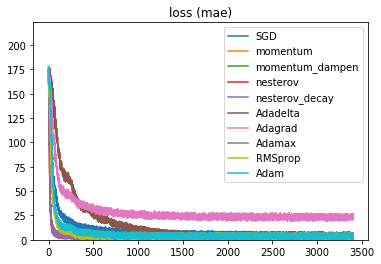

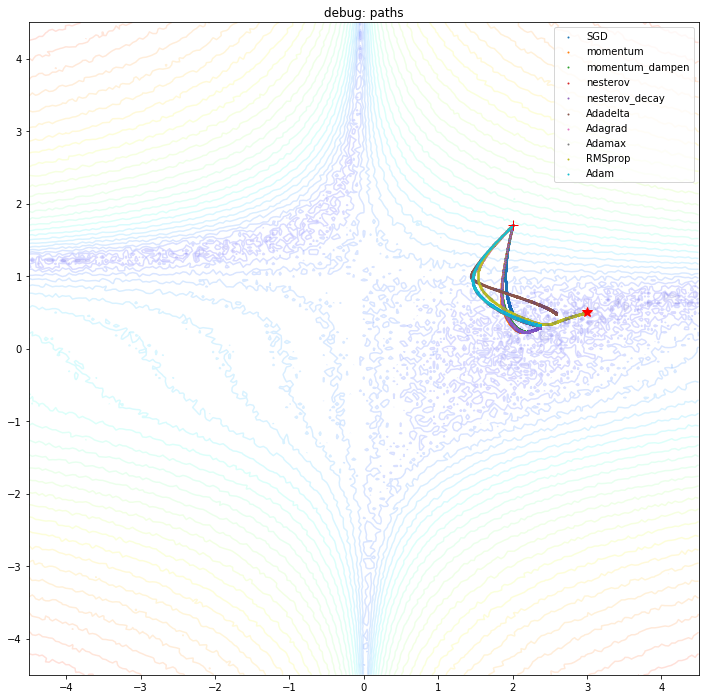

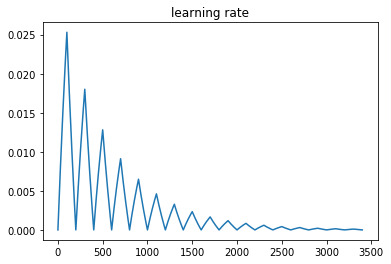

In [16]:
optviz.plot_optim_journeys(zpaths, results, distance, lrs, params)

## How to control the capacity of our model

### To increase capacity
- Add more layers
- Add more neurons by layers
- Add more epochs
- Select a optimizer method more complex

### To decrease capacity
- More training data 
- Regularization

## L2 or Weight decay

Penalize large parameters

$$ L_{reg}  = L + \frac{\lambda}{2*N} * \sum w_{li^2}$$

update with an additional decay term

$$ w_{reg} = \left(1-\frac{l_{r} * \lambda}{m}\right) * w - l_{r} * dw $$

## Batch Norm

was created in 2016

similar to normalize inputs, but in intermediate layers.
- for a batch of data calculate the mean and variance
- Update the data by subtracting the mean and dividing by variance plus epsilon
- transform with: $ f (x) = mx + \beta $

## Dropout

<img width=500 src="https://miro.medium.com/max/996/1*zwucz12TmYEaca5OcaPvbA.png">

## Data augmentation

<img width=500 src="https://www.kdnuggets.com/wp-content/uploads/cats-data-augmentation.jpg">

## Parameter optimization

### Babysitting (panda)

- Successive iterations, testing parameters and waiting for the result
- Also known as Studient gradient descend
- It is not systematic enough

### GridSearch
- see in week 10

### RandomSearch
- see in week 10

- Random search is more efficient for deep learning
- the best way to use it is by defining the range of the parameters with the correct scale:
    - LR = Logarithmic Scale
    - batch_size = powers of 2
- for computational cost issues we can only choose to optimize a hyperparameter

#### Hyperparameters with greater importance:
- Learning Rate
- Momentum
- Mini-batch size
- Neurons in each layer
- Number of layers